# CREDIT CARD FRAUD DETECTION USING XGBOOST


Credit card fraud occurs when unauthorized parties make transactions using someone else’s card. It’s a global challenge that affects many countries, making it important to take effective measures against it. Implementing machine learning algorithms can help detect fraudulent transactions and track cybercriminals, a process known as credit card fraud detection.

In [1]:
import numpy as np
import pandas as pd

# to read the data set
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.shape

(284807, 31)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# to check some missing values in the data set 
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Data Visualization 


CASE COUNT
--------------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of fraud cases are 492
Percentage of Non-fraud cases is 99.82725143693798 % of total
Percentage of fraud cases is 0.1727485630620034 % of total


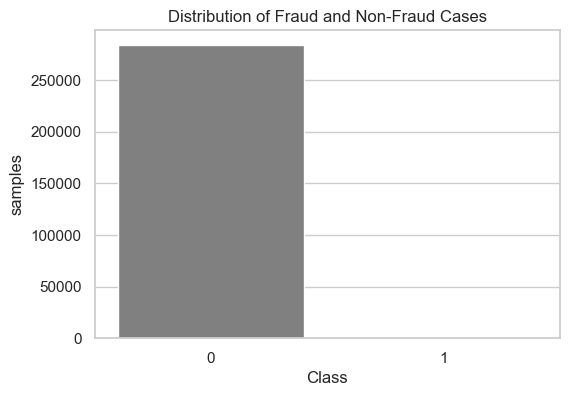

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fraud_count = len(df[df.Class == 1])
none_fraud_count = len(df[df.Class == 0])

print('CASE COUNT')
print('--------------------------------------------')
print('Total number of cases are {}'.format(len(df)))
print('Number of Non-fraud cases are {}'.format(none_fraud_count))
print('Number of fraud cases are {}'.format(fraud_count))

print('Percentage of Non-fraud cases is {} % of total'.format((none_fraud_count/len(df['Class'])*100)))

print('Percentage of fraud cases is {} % of total'.format((fraud_count/len(df['Class'])*100)))

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(6, 4))
x=df.Class.value_counts()
sns.barplot(x= x.index, y = x.values, color="grey")
plt.gca().set_ylabel('samples')
plt.title('Distribution of Fraud and Non-Fraud Cases')
plt.show()

from the above barplot we can confidently add that there is a imbalance in the data set here percentage of majority class is 99.83% whereas percentage of minority is only 0.17% so there is a huge imbalanace in the data set and it need to be adressed in order to get accuracy percission and better performance. 

In [6]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

In [7]:
nonfraud_cases.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [8]:
fraud_cases.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

amount = df['Amount'].values
df['Amount'] = scaler.fit_transform(amount.reshape(-1, 1))

print(df['Amount'].head())

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Amount, dtype: float64


In [10]:
# Defining features and target

In [11]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

### Split Data

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=.33, random_state=7)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 190820
Testing set size: 93987


# Train The Model 

#### Boosting
Boosting is a sequential technique where each new model aims to correct errors made by previous models. By combining multiple "weak learners," we create a robust final model that improves accuracy.

Types of Boosting:
            -Gradient Boosting  -AdaBoost   -XGBoost

XGBoost
XGBoost is an advanced version of gradient boosting that is widely used in machine learning. It’s significantly faster—up to 10 times compared to other methods—and includes various regularization techniques to prevent overfitting and enhance performance
            

In [16]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score,f1_score,classification_report

In [18]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 328.2 kB/s eta 0:06:21
   ---------------------------------------- 0.1/124.9 MB 403.5 kB/s eta 0:05:10
   ---------------------------------------- 0.1/124.9 MB 403.5 kB/s eta 0:05:10
   ---------------------------------------- 0.1/124.9 MB 400.9 kB/s eta 0:05:12
   ---------------------------------------- 0.2/124.9 MB 437.1 kB/s eta 0:04:46
   ---------------------------------------- 0.2/124.9 MB 436.9 kB/s eta 0:04:46
   ----------------------------

In [19]:
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

C:\Users\PMLS\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:24:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [20]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [21]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.96%


In [22]:
precision = precision_score(y_test, predictions)
print("Precision : %.2f%%" % (precision * 100.0))

Precision : 95.07%


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93821
           1       0.95      0.81      0.88       166

    accuracy                           1.00     93987
   macro avg       0.98      0.91      0.94     93987
weighted avg       1.00      1.00      1.00     93987

Confusion Matrix:
[[93814     7]
 [   31   135]]


### Classification Report Summary

The classification report indicates strong performance metrics for our model:

    Precision: The model demonstrates a precision of 100% for class 0 (non-fraud) and 95% for class 1 (fraud).
    Recall: It achieves a recall of 100% for class 0 and 81% for class 1.
    F1-Score: The F1-scores are 1.00 for class 0 and 0.88 for class 1, reflecting a solid balance between precision and recall for both classes.
    Overall Accuracy: The model has an impressive overall accuracy of 99.99%